Name: **Naman Kumar Singh**
Prn no: 72158839F
Roll no: 45
Class: BE(IT)
Subject: Deep Learning

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pathlib

In [2]:
Image_Shape = (224,224)

In [3]:
URL_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file(origin = URL_dataset, fname='flower_photos' ,untar= True)

In [5]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
'''data_dir = pathlib.Path(data_dir)
file_list = list(data_dir.glob('*/*.jpg'))
half_file_list = file_list[:len(file_list) // 2]
#image_count = len(list(data_dir.glob('*/*.jpg')))
image_count = len(half_file_list)
print(image_count)'''

"data_dir = pathlib.Path(data_dir)\nfile_list = list(data_dir.glob('*/*.jpg'))\nhalf_file_list = file_list[:len(file_list) // 2]\n#image_count = len(list(data_dir.glob('*/*.jpg')))\nimage_count = len(half_file_list)\nprint(image_count)"

In [7]:
flowers_images_dict = {"daisy" : list(data_dir.glob('daisy/*')),
                      "dandelion" : list(data_dir.glob('dandelion/*')),
                      "roses" : list(data_dir.glob('roses/*')),
                      "sunflowers" : list(data_dir.glob('sunflowers/*')),
                      "tulips" : list(data_dir.glob('tulips/*'))}

flowers_labels_dict = {"daisy" : 0,
                       "dandelion" : 1,
                       "roses" : 2,
                       "sunflowers" : 3,
                       "tulips" : 4}

X, Y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, Image_Shape)
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])
X = np.array(X)
Y = np.array(Y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
tf_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [11]:
classifier = tf.keras.Sequential([hub.KerasLayer(tf_model, input_shape = (224,224,3), trainable=False),
tf.keras.layers.Dense(len(flowers_labels_dict), activation = "softmax")])

In [12]:
classifier.summary()
classifier.compile(optimizer="adam",
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [13]:
classifier.fit(X_test_scaled, Y_test, epochs = 5)
#classifier.evaluate(X_test_scaled, Y_test)

Epoch 1/5
29/29 [==============================] - 19s 509ms/step - loss: 1.1570 - accuracy: 0.5545
Epoch 2/5
29/29 [==============================] - 15s 515ms/step - loss: 0.6117 - accuracy: 0.7843
Epoch 3/5
29/29 [==============================] - 15s 513ms/step - loss: 0.4485 - accuracy: 0.8562
Epoch 4/5
29/29 [==============================] - 15s 510ms/step - loss: 0.3619 - accuracy: 0.8976
Epoch 5/5
29/29 [==============================] - 15s 510ms/step - loss: 0.3059 - accuracy: 0.9194


In [14]:
classifier.evaluate(X_test_scaled, Y_test)

29/29 [==============================] - 16s 531ms/step - loss: 0.2672 - accuracy: 0.9434


[0.2671930491924286, 0.943355143070221]

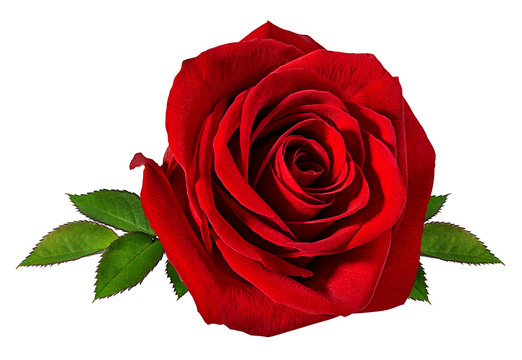

In [16]:
from PIL import Image
img = Image.open("C:\\Users\\abhij\\OneDrive\\Desktop\\FINAL\\Test image.jpg")
img

In [17]:
img = tf.keras.preprocessing.image.img_to_array(img.resize(Image_Shape))
img = np.array([img])

In [18]:
res = classifier.predict(img)

1/1 [==============================] - 1s 592ms/step


In [19]:
print("The prediction is : {}".format(list(flowers_labels_dict.keys())[np.argmax(res)]))



The prediction is : roses
